## Importación de librerías

In [53]:
import os
import json
import kaggle
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier

from pickle import dump
from pickle import load

import warnings
warnings.filterwarnings('ignore')

## Descargar e importar dataset

In [54]:
#kaggle.api.dataset_download_files(dataset='mlg-ulb/creditcardfraud', path='.', unzip=True, quiet=True)
dataset = read_csv('creditcard.csv')

## Análisis exploratorio de datos

### Estadísticos descriptivos

In [55]:
dataset.shape

(284807, 31)

In [56]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [57]:
# Chequear el número de fraudes y legítimas
class_names = {0: 'Not Fraud', 1: 'Fraud'}
print(dataset.Class.value_counts().rename(index=class_names))

Class
Not Fraud    284315
Fraud           492
Name: count, dtype: int64


### Visualización de datos

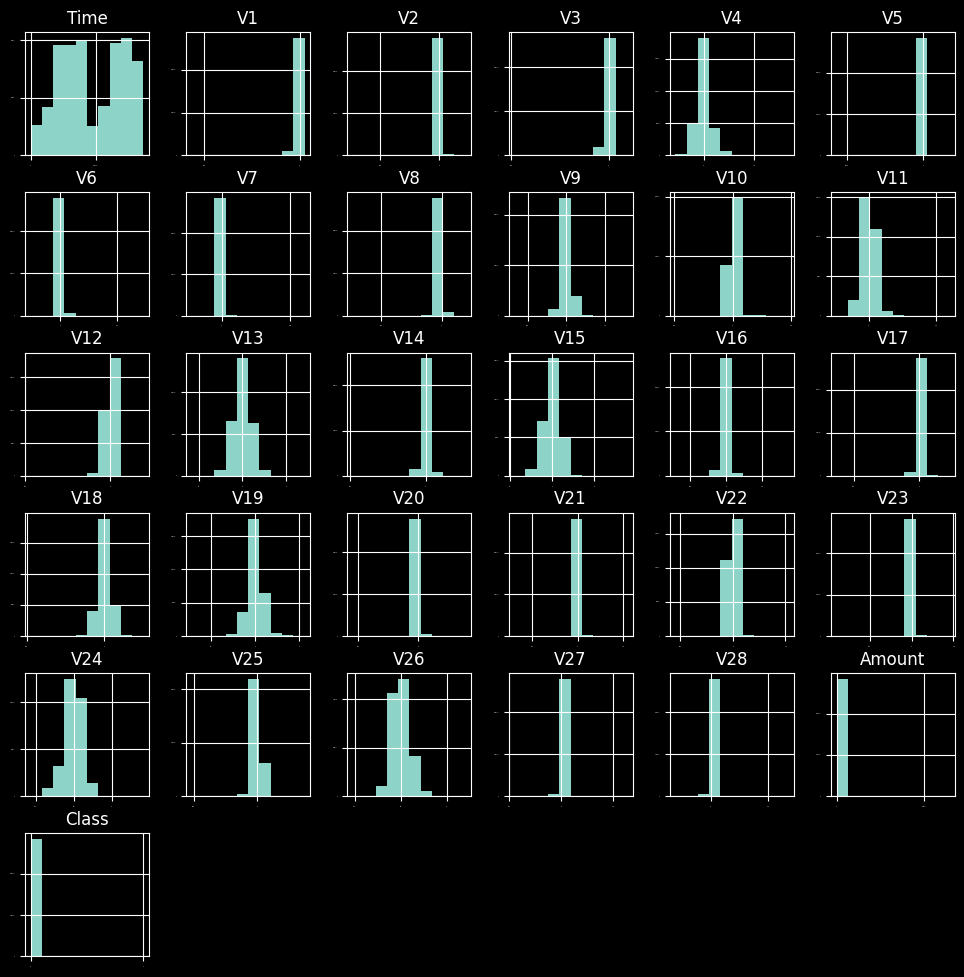

In [58]:
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12, 12))
pyplot.show()

## Preparación de los datos

In [59]:
dataset.isnull().values.any()

False

In [60]:
# Random Under Sampling para balancear el dataset
df = dataset.copy()
filtered_df = df.loc[(df['Class'] == 1) | (df['Class'] == 0)]
sampled_zeros = df[df['Class'] == 0].sample(n=492)
dataset = pd.concat([df[df['Class'] == 1], sampled_zeros]).reset_index(drop=True)
dataset.Class.value_counts()

Class
1    492
0    492
Name: count, dtype: int64

### Selección de características

In [61]:
bestfeatures = SelectKBest(k=10)
Y = dataset['Class']
X = dataset.loc[:, dataset.columns != 'Class']
fit = bestfeatures.fit(X, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns = ['Specs', 'Scores']
X = dataset.loc[:, feature_scores.nlargest(10, 'Scores')['Specs'].values.tolist()]

## Evaluación de algoritmos y modelos

In [62]:
# Train y test split
validation_size = 0.2
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, shuffle=True, random_state=7)
scoring = 'accuracy'

In [63]:
# opciones para clasificación
num_folds = 10

In [64]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('NN', MLPClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))


In [65]:
def create_model(neurons=12, activation='relu', learn_rate=0.01, momentum=0.9):
    model = Sequential()
    model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = SGD(learning_rate=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
models.append(('DNN', KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)))

In [69]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')


LR: 0.9338526452450504 (0.03066698226228641)
LDA: 0.8906523855890945 (0.0343322901485596)
KNN: 0.9325868224602403 (0.025707824689340384)
CART: 0.8995293735800066 (0.024139195492953076)
NB: 0.9185816293411231 (0.03483476701942767)
SVM: 0.9300389483933789 (0.02935756681190673)
NN: 0.9389483933787732 (0.02479614541442644)
AB: 0.9275397598182409 (0.031747706744692954)
GBM: 0.9376825705939631 (0.02703844920668653)
RF: 0.9338688737422915 (0.03266609454448582)
ET: 0.9364329763063941 (0.03212849421407225)
DNN: 0.9301038623823434 (0.020685325384011168)


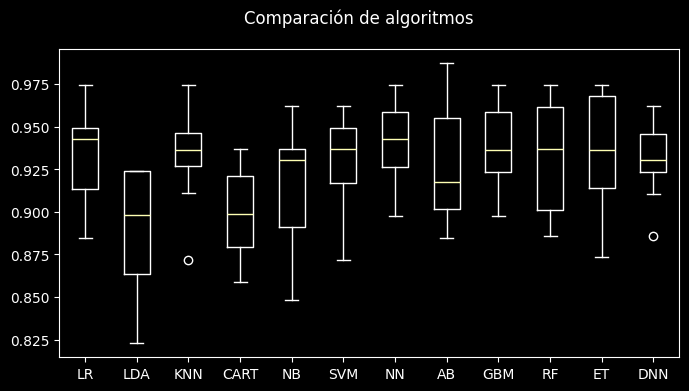

In [70]:
# Comparación de algoritmos
fig = pyplot.figure()
fig.suptitle("Comparación de algoritmos")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8, 4)
pyplot.show()

In [83]:
mean_results = [np.mean(i) for i in results]
best_model_index = mean_results.index(max(mean_results))
best_model_name = names[best_model_index]
print(f'Best model: {best_model_name}')

Best model: NN


In [ ]:
# Escalar los datos
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_validation = std_scaler.transform(X_validation)

In [89]:
# Mejor modelo
model = MLPClassifier(max_iter=500, warm_start=True)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.949238578680203
[[104   3]
 [  7  83]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       107
           1       0.97      0.92      0.94        90

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(25, 50, 25), (50, 100, 50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive']
}
grid_model = GridSearchCV(model, parameter_space, n_jobs=-1, cv=kfold)
grid_model.fit(X_train, Y_train)
print(f'Best params: {grid_model.best_params_}')
Y_pred = grid_model.predict(X_validation)
print(classification_report(Y_validation, Y_pred))